## Scikit-learn notes:

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set()

In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


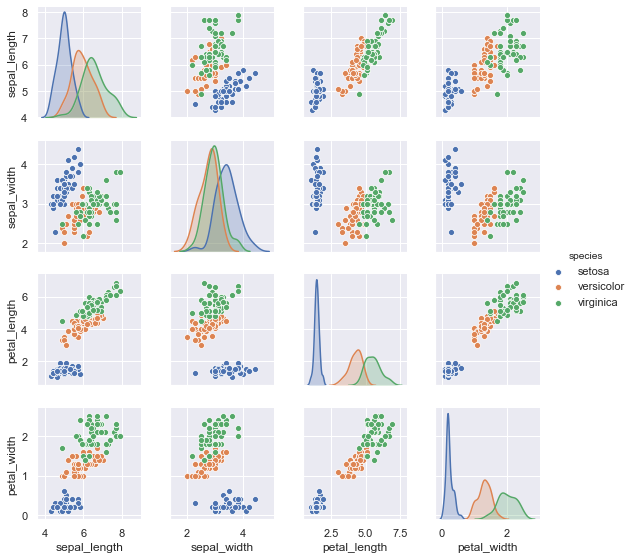

In [8]:
sns.pairplot(iris, hue='species', height=2)

to start building useful models with this data, we must split it into a set of feature matrix and target array. That is the thing we want to predict, and the features we'll use to make the prediction.

In [10]:
X_iris = iris.drop('species', axis=1) #Make a matrix without the species column
X_iris.shape

(150, 4)

In [11]:
Y_iris = iris['species']
Y_iris.shape

(150,)

Now we have a feature matrix, and a target vector that we can use in the modeling phase. 

## Scikit-learn estimator API:
The following steps encompass the most common usage of the scikit-learn estimator API:
+ Import the appropriate estimator class from scikit-learn.
+ Choose model hyperparameters by instantiating the class. 
+ Prepare data in a feature matrix/target vector (done above)
+ Fit the model to the data by calling the model instances fit() method.
+ Apply the model to new data:
    + Supervised learning: predict labels for unknown data with predict()
    + Unsupervised learning: transform or infer properties of the data with transform() or predict()
    
Now some examples:

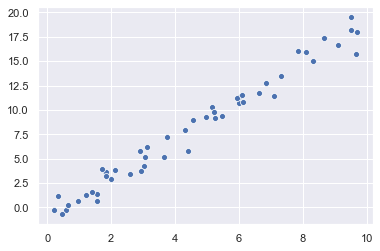

In [14]:
# Start out with a simple linear like dataset:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
sns.scatterplot(x, y)

We'll go through the above process step-by-step.

### Step 1: pick a model and import it.

Since the data is pretty linear (by design) we'll start with a simple linear model:

In [16]:
from sklearn.linear_model import LinearRegression

### Step 2: Choose hyperparameters

depending on the model, we may have the following options:

+ Would we like to fit for the offset (i.e., y-intercept)?
+ Would we like the model to be normalized?
+ Would we like to preprocess our features to add model flexibility?
+ What degree of regularization would we like to use in our model?
+ How many model components would we like to use?

These represent some choices that need to be made once we've picked the model and are going to instantiate it. 
More on these choices and others later...

In [17]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 3: Properly format the data
We need to get our values into proper shape. The X values must be a feature matrix of size: [n_samples x m_features] and Y should be a simple vector.

In [23]:
X = x[:, np.newaxis]

In [24]:
X.shape

(50, 1)

In [25]:
y.shape

(50,)

### Step 4: Fit the model
With the data in the correct format we can call the model's fit() method. 

In [26]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

fit() causes a number of model-dependent internal computations to take place, the results of which are stored in model-specific attributes. By convention, all model parameters that were learned during the fit() process have trailing underscores. For our linear model, we have the following:

In [27]:
model.intercept_

-0.9033107255311146

In [28]:
model.coef_

array([1.9776566])

These represent the y-intercept and slope of the model, and if we compare these values to those given in the definition of y, we can see they're pretty exact. 

In general, Scikit-Learn does not provide tools to draw conclusions from the internal model parameters. Interpreting model parameters is more of a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model *predicts*.

### Step 5: apply the model to new data
Now that we've fit a model, we can use it to perform predictions on previously unseen data (not in the training set used to fit the model)

In [29]:
# We'll use a grid of new x values and ask the model what it predicts for the y values:
xfit = np.linspace(-1, 11)

In [31]:
Xfit = xfit[:, np.newaxis] # Proper formatting!
yfit = model.predict(Xfit)

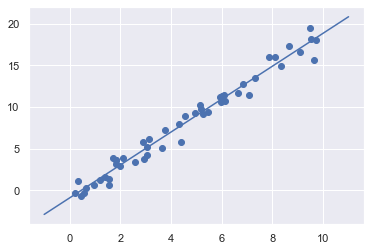

In [33]:
# Now we can look at the scatter plot of x and y, and the predicted model values based on the unseen xfit dataset.
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised learning:
Using the iris dataset from earlier, we'll know look into how well we can predict labels. For this we'll use a Gaussian naive Bayes model which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. This technique is fast, and doesn't have any hyperparameters to choose from, which makes it a good baseline model. 

In [37]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, Y_iris,
                                                random_state=1)

In [39]:
from sklearn.naive_bayes import GaussianNB # Step 1: import the model
gnb_model = GaussianNB()                   # Step 2: initialize, no hyperparameters
gnb_model.fit(Xtrain, ytrain)              # Step 4: fit model, no step3 as data is already formatted.
y_model = gnb_model.predict(Xtest)         # Step 5: predict on unseen data.

In [40]:
# Now we can check the predictions with the accuracy score utility:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Super effective! 

### Unsupervised learning: Iris dimensionality
Principle Component Analysis (PCA) can help reduce dimensionality and make it easier to visualize what is happening with the data. PCA finds correlation between data in various features and projects that correlation to a lower deminsion space with a new feature name. 
linear dimensionality reduction, fast. 

In [41]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2) # PCA will look to reduce dimensionality to 2d.
pca_model.fit(X_iris)           # No need to specify y values since this is unsupervised
X_pca_2d = pca_model.transform(X_iris) # perform the transformation into 'PCA space'

X_pca_2d now contains the original iris data set (4d) but projected into a 'PCA' space that contains 2 pca features PCA1 and PCA2. These don't directly connect to anything in the normal space, but we'll see what they look like next.

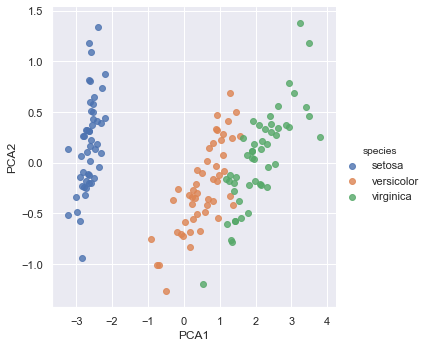

In [44]:
# let's insert these pca features into the original df and then graph.
iris['PCA1'] = X_pca_2d[:, 0]
iris['PCA2'] = X_pca_2d[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In 'PCA space', the different species are fairly well sperated without any notion of the species label. This would indicate that a straight forward classification (like the gaussian naive bayes) would work well. 

### Unsupervised learning: iris clustering
K-means is a great algorithm for clustering, but it has two issues:
+ lack of flexibility in cluster shape.
+ lack of probabilistic cluster assignment.
Clusters are always circular from mean point to the point furthest away in the cluster, and there is no probability assignment to the clustering. Since we've visualized the data and know it's oblong, we'll use a gaussian mixture model instead which fixes our kmeans issues.

the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the *distribution* of the data. This means GMM gives a playbook for generating new data based on the distribution densities it calculates. 

A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting.

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
gm_model = GaussianMixture(n_components=3, covariance_type='full') # 3 species/clusters, each with their own covariance
gm_model.fit(X_iris) # no y values specified as we're fitting clusters
gm_y = gm_model.predict(X_iris)

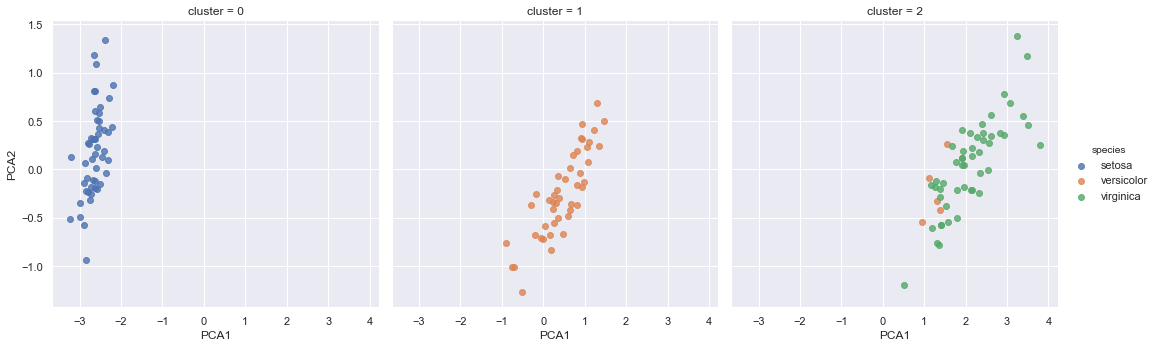

In [50]:
iris['cluster'] = gm_y # add the predicted cluster values to the iris df
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

We see that the clustering algorithm is powerful enough to almost completely seperate the species.

### Exploring handwritten digits. 
Now we'll use the tools and techniques we've just gone over on a more interesting problem

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [62]:
def plot_digits(data):
    fig, ax = plt.subplots(8, 8, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        axi.text(0.05, 0.05, str(digits.target[i]),transform=axi.transAxes, color='green')
        im.set_clim(0, 16)

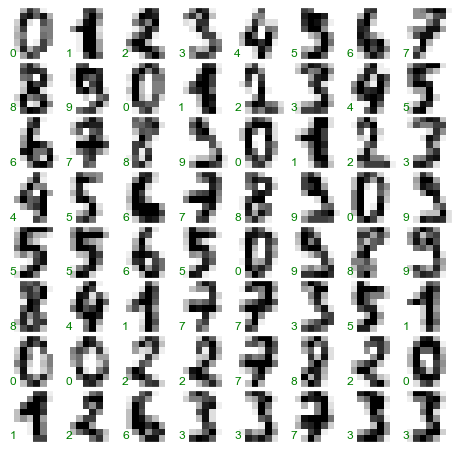

In [63]:
plot_digits(digits.images[:64])

To work with this data we'll need a a matrix in the form of: [n_samples, m_features]. If we treat each pixel as a feature, we can use the ndarray of pixel values as our feature set.

In [67]:
digits.data[0] # a length 64 array representing the pixel values in an 8x8 digit image.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [68]:
X_digits = digits.data
X_digits.shape

(1797, 64)

In [70]:
y_digits = digits.target
y_digits.shape

(1797,)

### Dimensionality issues:
we have the data in an easy to use format, but its dimensionality is pretty high (i.e. it's 64)

Instead of using PCA, we'll try an isomap from the manifold package. The main difference here is that PCA works really well with linear relationships between data, but doesn't handle *non-linear* relationships. 

The only advantage that manifold learning seems to have over PCA is its preservation of non linear relationships. With high dimensional data from 'real world' examples, isomaps tend to give meaningful relationships. 

t-SNE when data is highly clustered. 



In [81]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

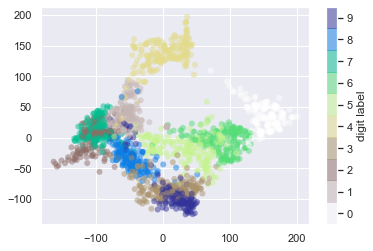

In [96]:
# let's insert these pca features into the original df and then graph.
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('terrain_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This visual shows how the different digits are seperated into the 64 dimensional feature space. Using the digit label on the right we can see that zeroes are almost completely seperate from most the other digits, but especially the '1's. (however they're close to 6 which also contains a circular structure).

We do see decent partitioning of the digits in the space, which indicates that a straight forward supervised classification problems should work well. 

### Classification on digits:

In [97]:
# Test/train split:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_digits, y_digits, random_state=0)

In [99]:
digits_nb = GaussianNB()
digits_nb.fit(Xtrain, ytrain)
y_model = digits_nb.predict(Xtest)

In [101]:
digits_score = accuracy_score(ytest, y_model)
digits_score

0.8333333333333334

A straight forward model with no tweaking yields 83% accuracy! Pretty solid for just a few lines of code. 

To improve, we can look at a confusion matrix to see which digits we're misclassifying.

In [102]:
from sklearn.metrics import confusion_matrix
digits_conf_mat = confusion_matrix(ytest, y_model)

Text(89.18, 0.5, 'true value')

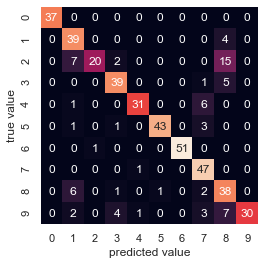

In [105]:
sns.heatmap(digits_conf_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Here we see a large number of '2' being classified as '1' or '8'. 

With a little adjustment to the plot_images() from above, we can see which images were misclassified and what the model predicted for that image.

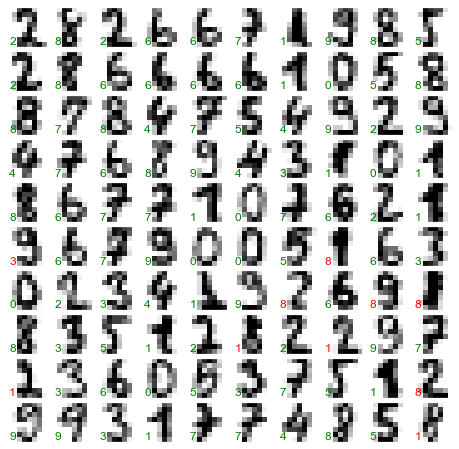

In [107]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')